# Machine Learning with Python



#               Karim Naous

Using a popular dataset, this project uses Machine Learning to deduce which individuals are the most likely to survive the sinking of the titanic. 

In [ ]:

import numpy as np 
import pandas as pd 
import random
import warnings as warnings
import io
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Machine Learning imports
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB 
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.exceptions import DataConversionWarning
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold # import KFold

# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from mlxtend.plotting import plot_confusion_matrix

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Uploading and Reading the Data**

Uploading data

In [ ]:

from google.colab import files
uploaded = files.upload()


Reading data 

In [ ]:

train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['gender_submission.csv'])) # y_test
data = pd.read_csv(io.BytesIO(uploaded['all_data.csv']))


# Data Exploration

Survival Rate with respect to age and sex

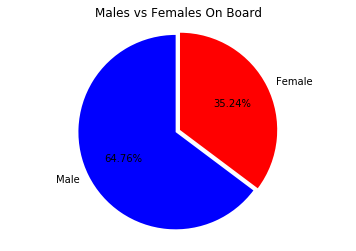

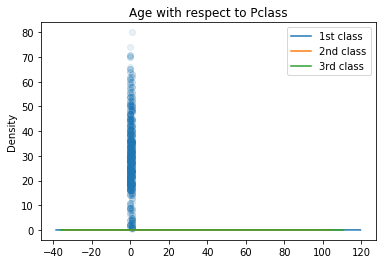

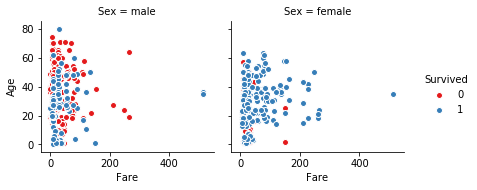

In [ ]:

labels = 'Male', 'Female'
sections = [577,314]
colors = ['b', 'r']

plt.pie(sections, labels=labels, colors=colors, startangle=90, explode = (0, 0.05), autopct = '%1.2f%%')

plt.axis('equal') 
plt.title('Males vs Females On Board')
plt.show() 
plt.scatter(train_df.Survived, train_df.Age, alpha=0.1)  
plt.title("Age with respect to Survived") 
for x in [1,2,3]:    
    train_df.Age[train_df.Pclass == x].plot(kind="kde")
plt.title("Age with respect to Pclass")
plt.legend(("1st class","2nd class","3rd class")) 
g = sns.FacetGrid(train_df, hue="Survived", col="Sex", margin_titles=True, palette="Set1", hue_kws=dict(marker=["o", "o"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)


# Data Processing

Label Encoding

In [ ]:

# Change male/female to 0/1
data["Sex"] = data["Sex"].astype('category')
data["Sex"] = data["Sex"].cat.codes


Clean the data

In [ ]:

# Fill in NaN values in 'Age' and 'Fare'
datasets = [train_df, test_df, data]

for dataset in datasets:
    mean = data["Age"].mean()
    std = data["Age"].std()
    is_null = data["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = data["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = data["Age"].astype(float)

for dataset in datasets:
    mean = data["Fare"].mean()
    std = data["Fare"].std()
    is_null = data["Fare"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = data["Fare"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    data["Fare"] = age_slice
    data["Fare"] = data["Fare"].astype(float)


Slicing

In [ ]:

data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data[['Survived']]


Scaling

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(X)
y = scaler.fit_transform(y)


Splitting into train and test data

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


# Logistic Growth

Model

In [ ]:

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')

# fit the model with data
model.fit(x_train, y_train)

#predict
log_pred = model.predict(x_test)


Confusion Matrix and Accuracy Score

Confusion Matrix of Decision Tree:
  Accuracy Score:  0.8575063613231552


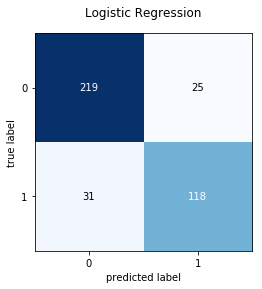

In [ ]:

resultsLog = confusion_matrix(y_test, log_pred) 
print ('Confusion Matrix of Decision Tree:')

print ('  Accuracy Score: ', accuracy_score(y_test, log_pred))



binary = resultsLog

fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.title("Logistic Regression")
plt.show() 


Reciever Operating Characteristic Plot

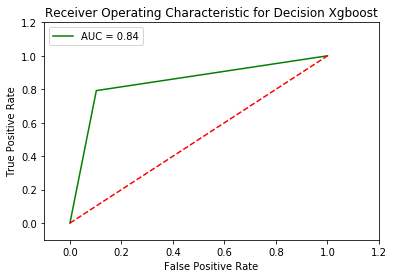

In [ ]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Decision Xgboost')
plt.plot(false_positive_rate, true_positive_rate, 'g',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 


# Decision Tree Model


Model

In [ ]:

decision_tree = DecisionTreeClassifier() 

decision_tree.fit(x_train, y_train)  

dec_pred = decision_tree.predict(x_test) 


Confusion Matrix and Accuracy Score

Confusion Matrix of Decision Tree:
  Accuracy Score:  0.8575063613231552


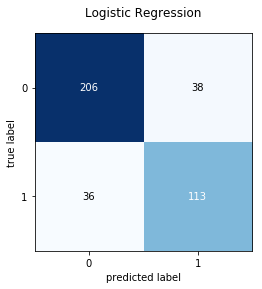

In [ ]:

resultsDec = confusion_matrix(y_test, dec_pred) 
print ('Confusion Matrix of Decision Tree:')
print ('  Accuracy Score: ', accuracy_score(y_test, log_pred))
binary = resultsDec
fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.title("Logistic Regression")
plt.show() 


Receiver Operating Characteristic Plot

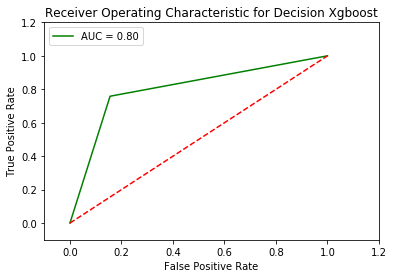

In [ ]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dec_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Decision Xgboost')
plt.plot(false_positive_rate, true_positive_rate, 'g',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 


# Support Vector Machine

Model

In [ ]:

clf = svm.SVC(gamma='scale')

clf.fit(x_train, y_train) 

clf_pred = clf.predict(x_test)


Confusion Matrix and Accuracy Score

Confusion Matrix of Decision Tree:
  Accuracy Score:  0.8575063613231552


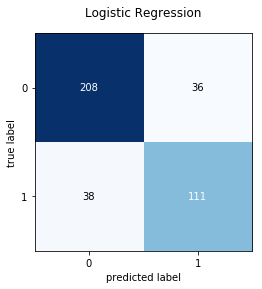

In [ ]:

resultsclf = confusion_matrix(y_test, clf_pred) 
print ('Confusion Matrix of Decision Tree:')
print ('  Accuracy Score: ', accuracy_score(y_test, log_pred))
binary = resultsDec
fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.title("Logistic Regression")
plt.show() 


Receiver Operating Characterisic Plot

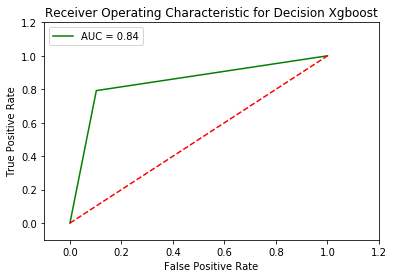

In [ ]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Decision Xgboost')
plt.plot(false_positive_rate, true_positive_rate, 'g',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 


# Gradient Boosting

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)

gbc_pred = gbc.predict(x_test)


Confusion Matrix and Accuracy Score

Confusion Matrix of Decision Tree:
  Accuracy Score:  0.8575063613231552


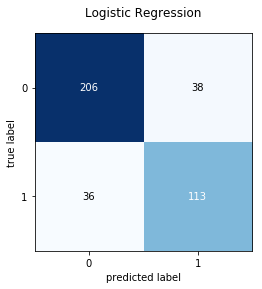

In [ ]:

resultsgbc = confusion_matrix(y_test, gbc_pred) 
print ('Confusion Matrix of Decision Tree:')
print ('  Accuracy Score: ', accuracy_score(y_test, log_pred))
binary = resultsDec
fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.title("Logistic Regression")
plt.show() 


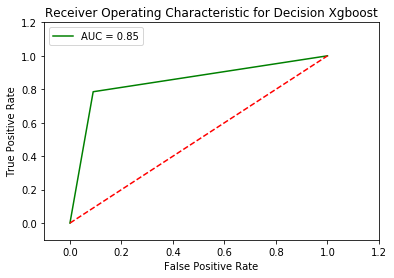

In [ ]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gbc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Decision Xgboost')
plt.plot(false_positive_rate, true_positive_rate, 'g',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 


# XGBoost

Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(x_train, y_train)

xg_pred = xg_reg.predict(x_test)

# Evaluation

Cross Validation Scores

Logistic Regression
Decision Tree
Support Vector Machine
Gradient Boost

In [ ]:

print("Average K-fold scores")
scoreslog = cross_val_score(model, x, y, cv=10, scoring = "accuracy")
scoresdec = cross_val_score(decision_tree, x, y, cv=10, scoring = "accuracy")
scoresclf = cross_val_score(clf, x, y, cv=10, scoring = "accuracy")
scoresgbc = cross_val_score(gbc, x, y, cv=10, scoring = "accuracy")
# scoresxg = cross_val_score(xg_reg, x_train, y_train, cv=10, scoring = "accuracy")
print("Logistic Regression: ", np.mean(scoreslog))
print("Decision Tree: ", np.mean(scoresdec)) 
print("Support Vector Machine: ", np.mean(scoresclf)) 
print("Gradient Boosting: ", np.mean(scoresgbc)) 
# print("XG Boosting: ", np.mean(scoresxgboost))


Average K-fold scores
Logistic Regression:  0.8560386305806154
Decision Tree:  0.8131013897044431
Support Vector Machine:  0.8545001690421538
Gradient Boosting:  0.8689054075695297


Out of the tested models, the one best fit to the data seems to be Gradient Boosting.